# PREVIOUS APPLICATION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## INFORMASI AWAL

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
previous_application = pd.read_csv('previous_application.csv')

In [4]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
previous_application.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [6]:
# Memisahkan kolom numerikal dan kategorikal
kolom_numerikal = previous_application.select_dtypes(include=['number']).columns
kolom_kategorikal = previous_application.select_dtypes(include=['object']).columns

## EDA KOLOM NUMERIKAL

### Describe

In [7]:
previous_application[kolom_numerikal].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1670214.0,1.923089e+06,532597.958696,1.000001e+06,1.461857e+06,1.923110e+06,2.384280e+06,2845382.000
SK_ID_CURR,1670214.0,2.783572e+05,102814.823849,1.000010e+05,1.893290e+05,2.787145e+05,3.675140e+05,456255.000
AMT_ANNUITY,1297979.0,1.595512e+04,14782.137335,0.000000e+00,6.321780e+03,1.125000e+04,2.065842e+04,418058.145
AMT_APPLICATION,1670214.0,1.752339e+05,292779.762387,0.000000e+00,1.872000e+04,7.104600e+04,1.803600e+05,6905160.000
AMT_CREDIT,1670213.0,1.961140e+05,318574.616546,0.000000e+00,2.416050e+04,8.054100e+04,2.164185e+05,6905160.000
AMT_DOWN_PAYMENT,774370.0,6.697402e+03,20921.495410,-9.000000e-01,0.000000e+00,1.638000e+03,7.740000e+03,3060045.000
AMT_GOODS_PRICE,1284699.0,2.278473e+05,315396.557937,0.000000e+00,5.084100e+04,1.123200e+05,2.340000e+05,6905160.000
HOUR_APPR_PROCESS_START,1670214.0,1.248418e+01,3.334028,0.000000e+00,1.000000e+01,1.200000e+01,1.500000e+01,23.000
NFLAG_LAST_APPL_IN_DAY,1670214.0,9.964675e-01,0.059330,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000
RATE_DOWN_PAYMENT,774370.0,7.963682e-02,0.107823,-1.497876e-05,0.000000e+00,5.160508e-02,1.089091e-01,1.000


### Boxplot

C:\Users\sanny\AppData\Local\Temp\ipykernel_3196\2433047877.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_3196\2433047877.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_3196\2433047877.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_3196\2433047877.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_3196\2433047877.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_3196\2433047877.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Local\Temp\ipykernel_3196\2433047877.py:6: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\sanny\AppData\Loca

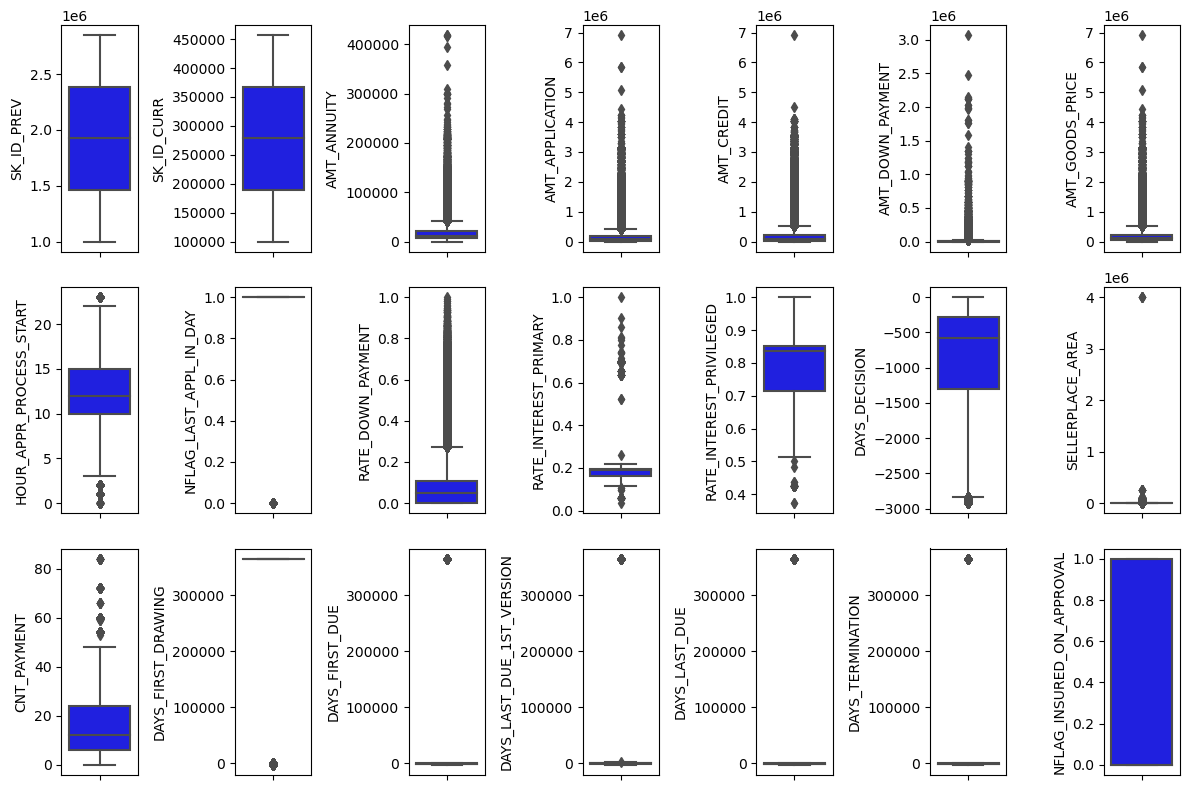

In [8]:
plt.figure(figsize=(12, 8))

for i in range(0, len(kolom_numerikal)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=previous_application[kolom_numerikal[i]], color='blue', orient='v')
    plt.tight_layout()

### Displot

C:\Users\sanny\AppData\Local\Temp\ipykernel_3196\821798150.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(previous_application[kolom_numerikal[i]], color='gray')
C:\Users\sanny\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sanny\AppData\Local\Temp\ipykernel_3196\821798150.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-l

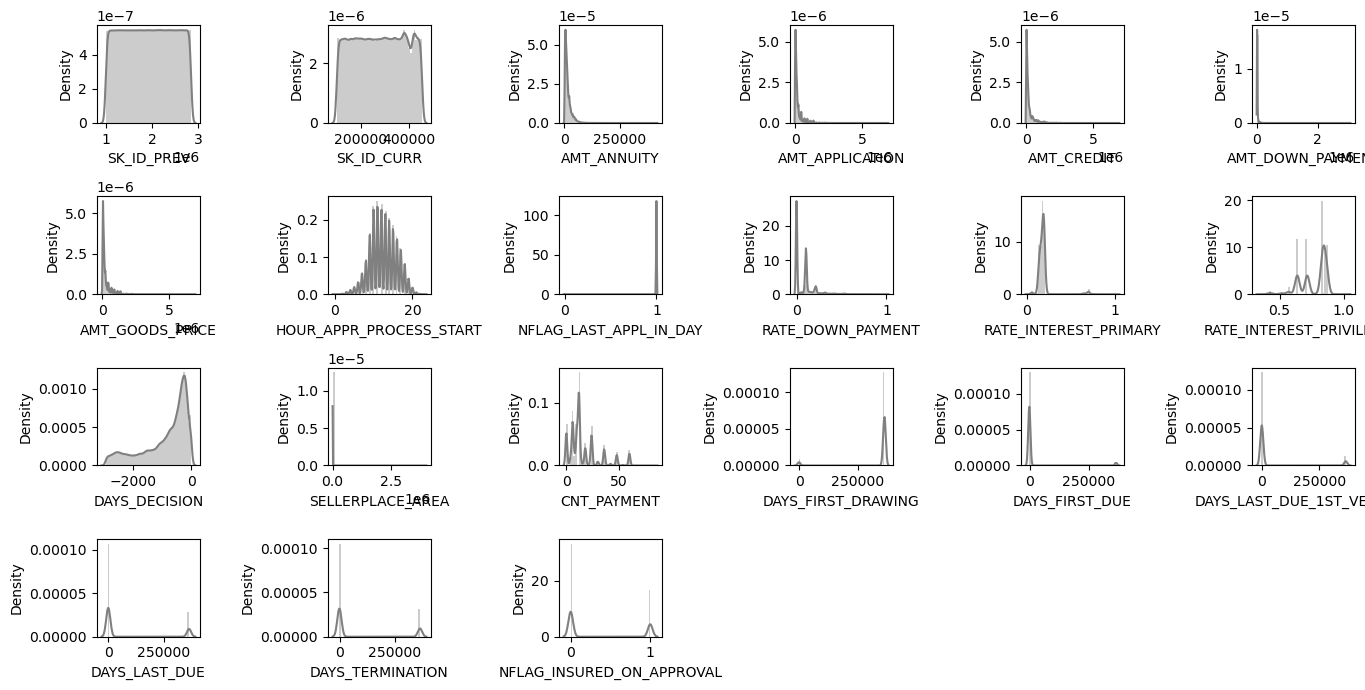

In [9]:
plt.figure(figsize=(14, 7))
for i in range(0, len(kolom_numerikal)):
    plt.subplot(4, 6, i+1)
    sns.distplot(previous_application[kolom_numerikal[i]], color='gray')
    plt.tight_layout()

### Heatmap

<Axes: >

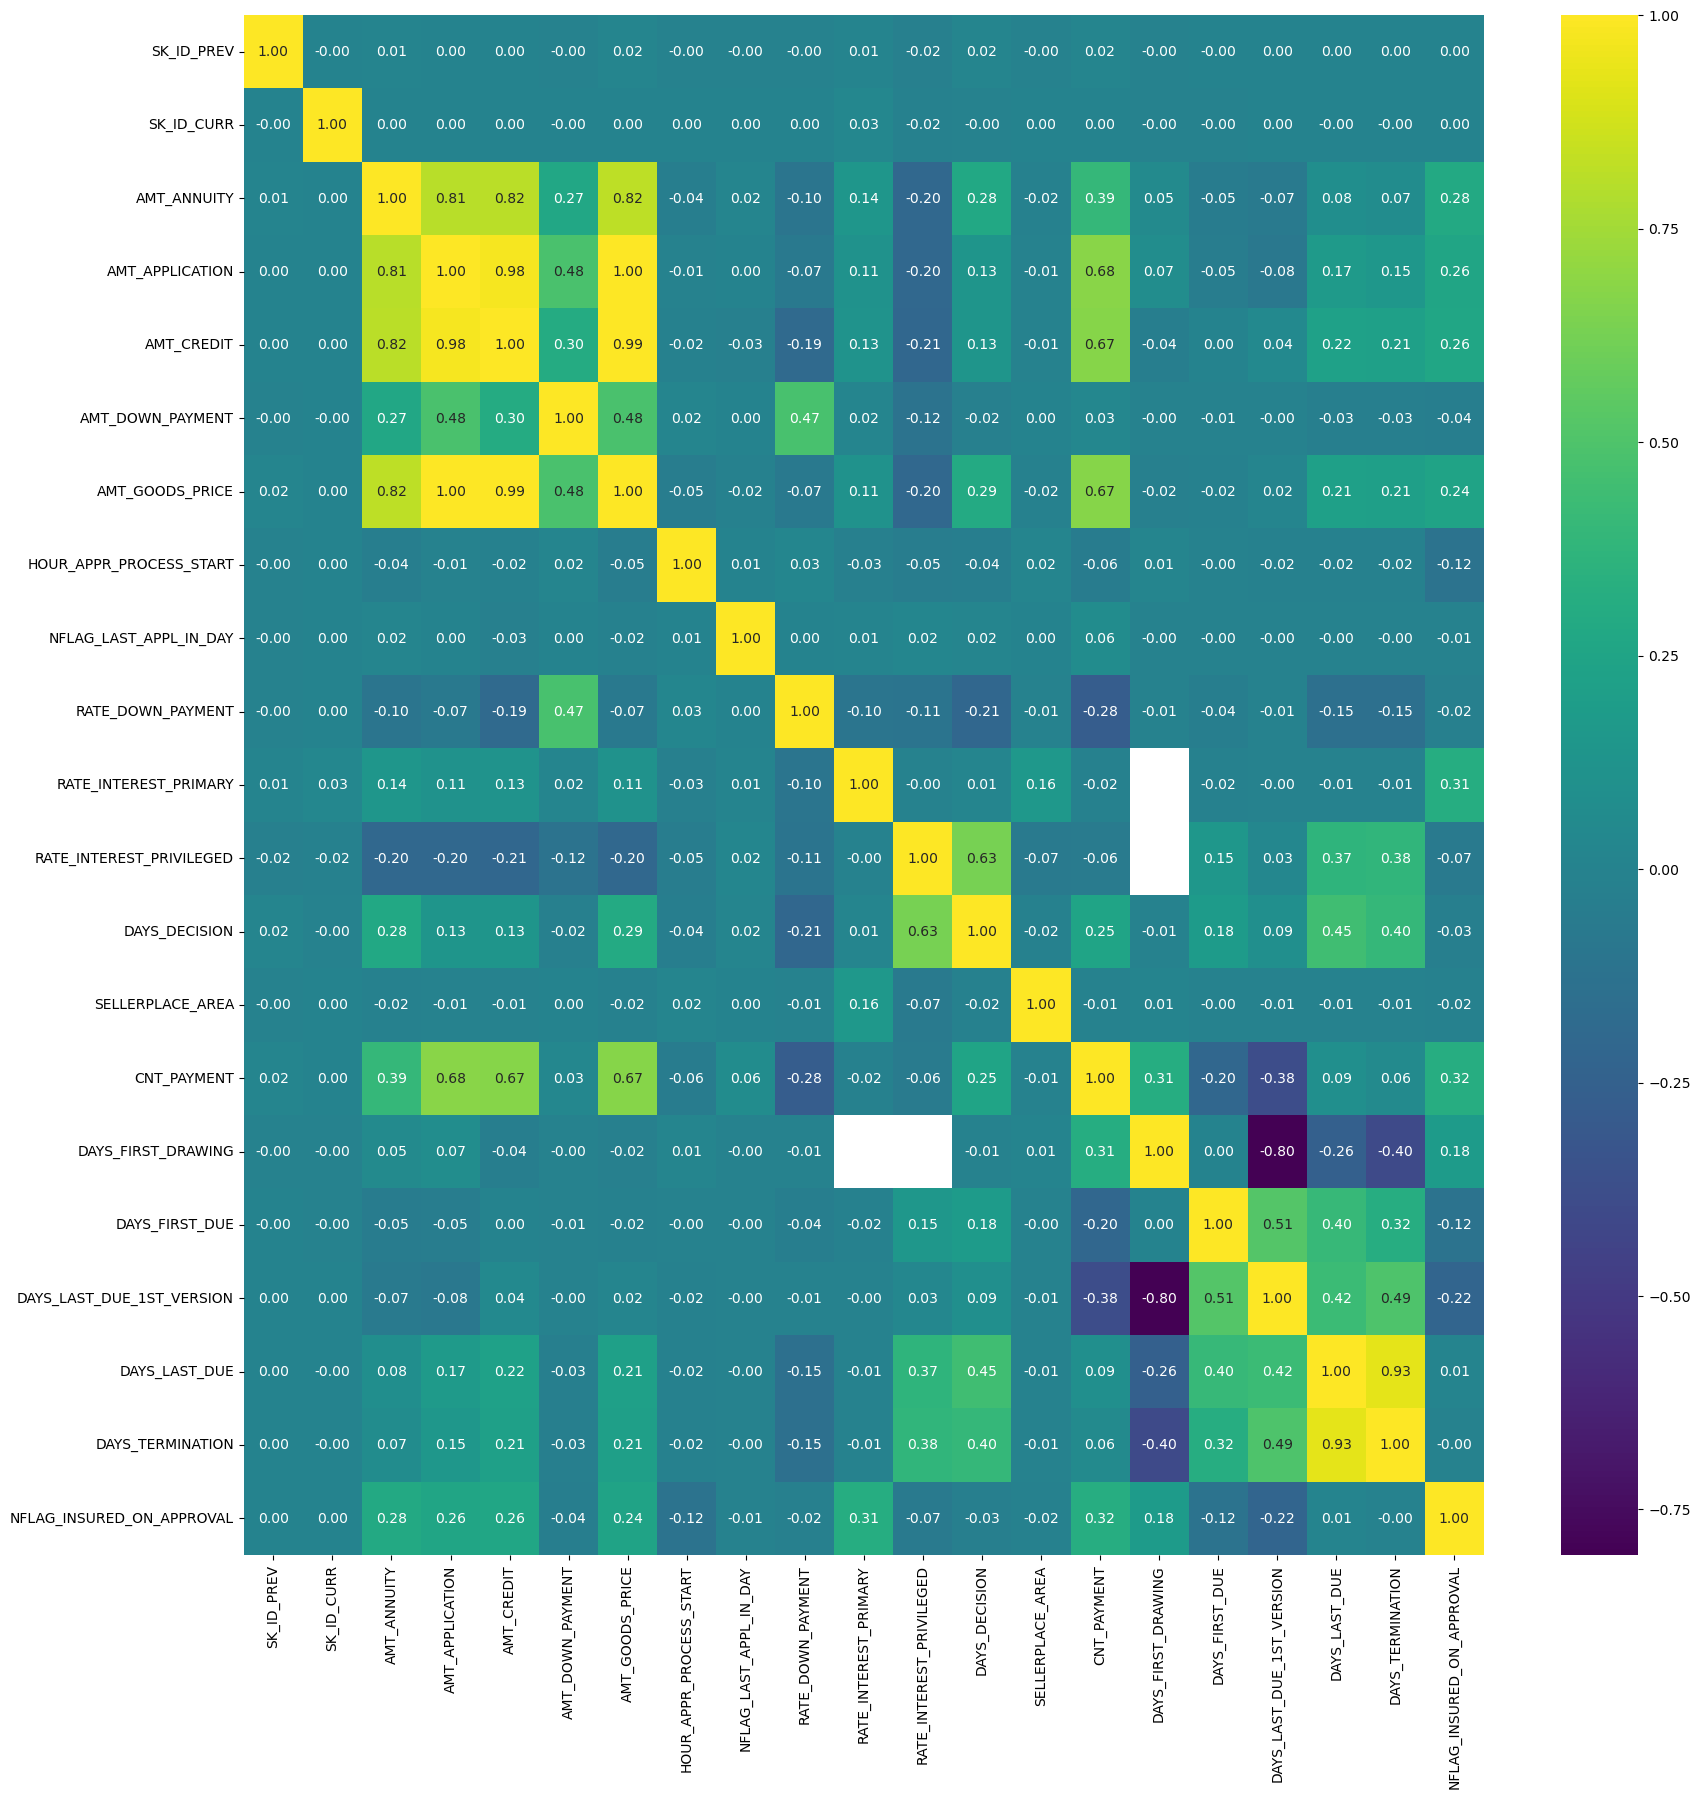

In [10]:
plt.figure(figsize=(20, 20))
sns.heatmap(previous_application[kolom_numerikal].corr(), cmap='viridis', annot=True, fmt='.2f')

## EDA KOLOM KATEGORIKAL

### Describe

In [11]:
previous_application[kolom_kategorikal].describe().transpose()

,count,unique,top,freq
NAME_CONTRACT_TYPE,1670214,4,Cash loans,747553
WEEKDAY_APPR_PROCESS_START,1670214,7,TUESDAY,255118
FLAG_LAST_APPL_PER_CONTRACT,1670214,2,Y,1661739
NAME_CASH_LOAN_PURPOSE,1670214,25,XAP,922661
NAME_CONTRACT_STATUS,1670214,4,Approved,1036781
NAME_PAYMENT_TYPE,1670214,4,Cash through the bank,1033552
CODE_REJECT_REASON,1670214,9,XAP,1353093
NAME_TYPE_SUITE,849809,7,Unaccompanied,508970
NAME_CLIENT_TYPE,1670214,4,Repeater,1231261
NAME_GOODS_CATEGORY,1670214,28,XNA,950809


### Nilai Unique Values

In [12]:
for col in kolom_kategorikal:
    print(f'''Value count kolom {col}:''')
    print(previous_application[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
NAME_CONTRACT_TYPE
Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: count, dtype: int64

Value count kolom WEEKDAY_APPR_PROCESS_START:
WEEKDAY_APPR_PROCESS_START
TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: count, dtype: int64

Value count kolom FLAG_LAST_APPL_PER_CONTRACT:
FLAG_LAST_APPL_PER_CONTRACT
Y    1661739
N       8475
Name: count, dtype: int64

Value count kolom NAME_CASH_LOAN_PURPOSE:
NAME_CASH_LOAN_PURPOSE
XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                           

### Barchart Distribusi Kategorikal

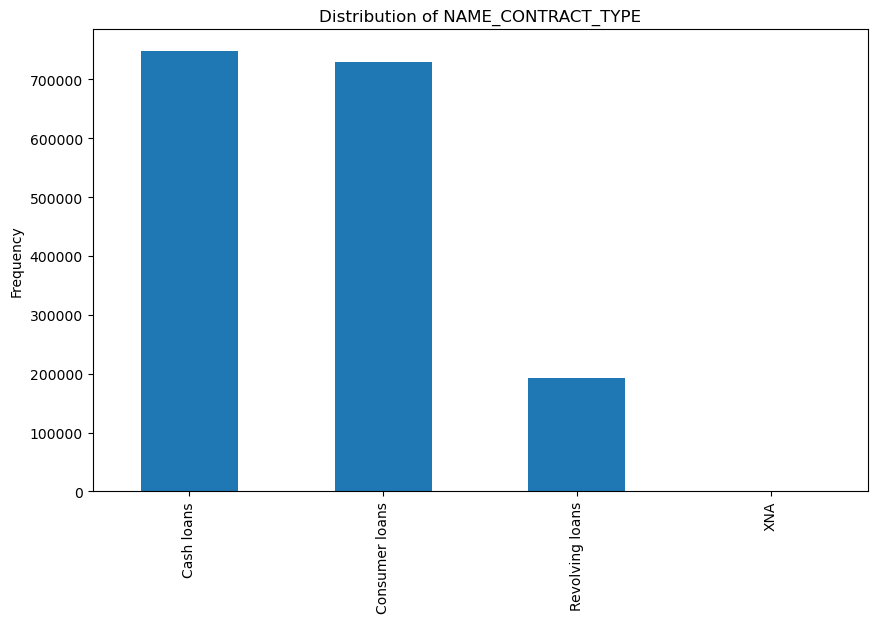

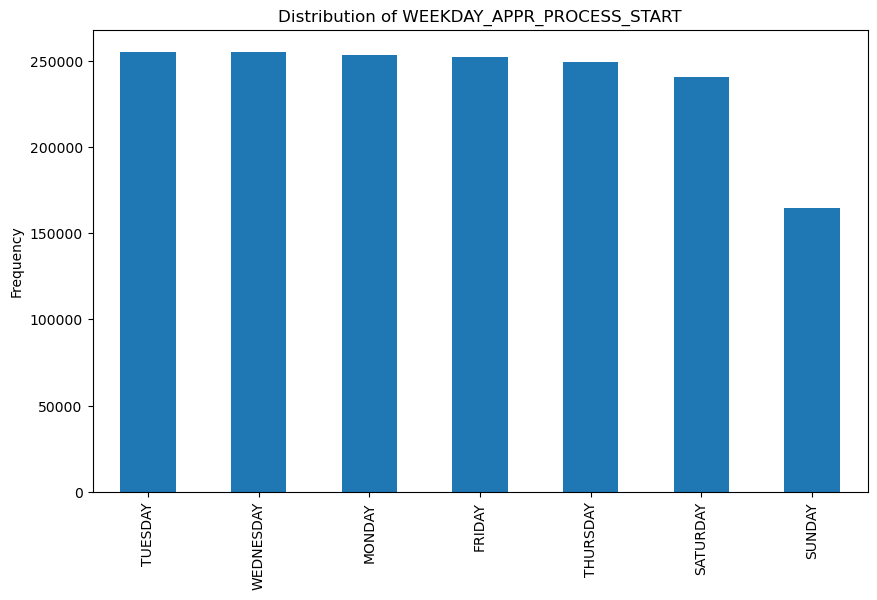

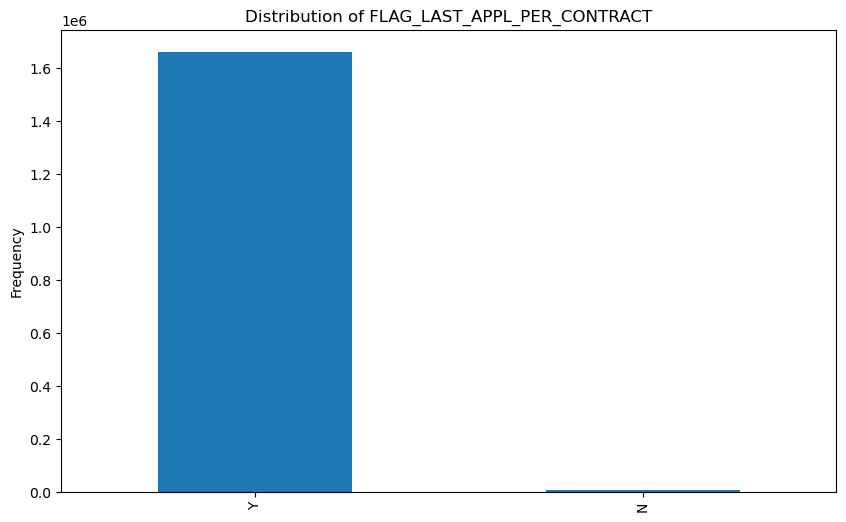

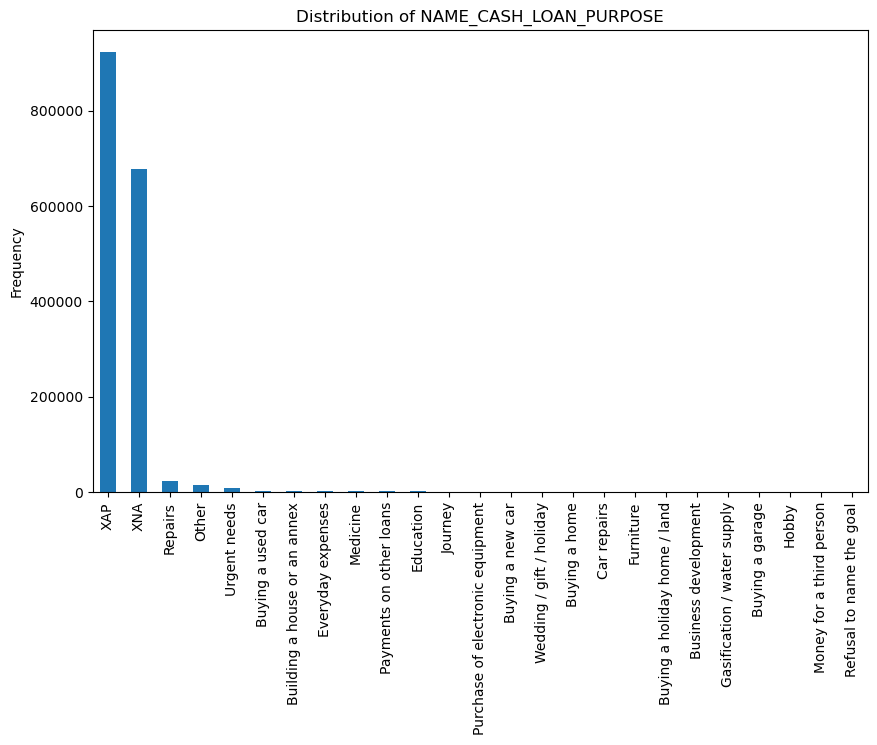

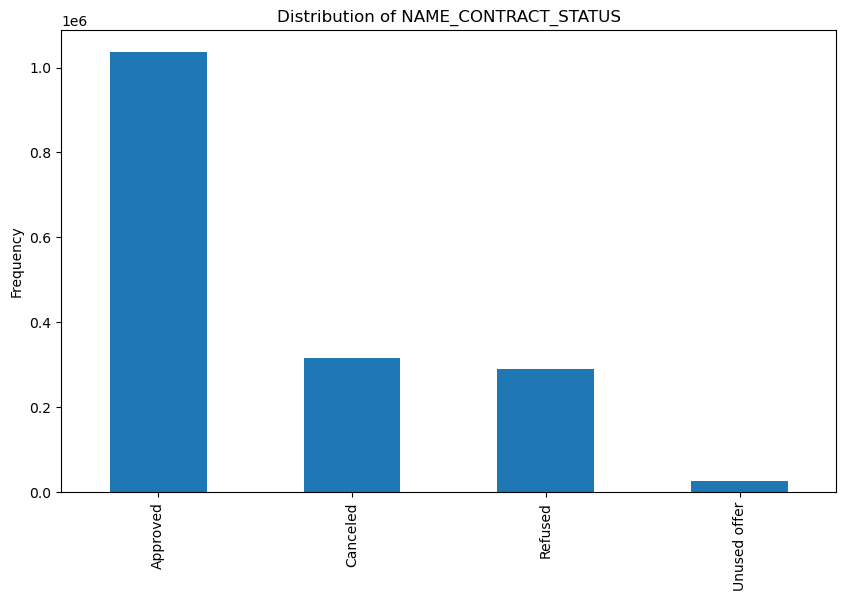

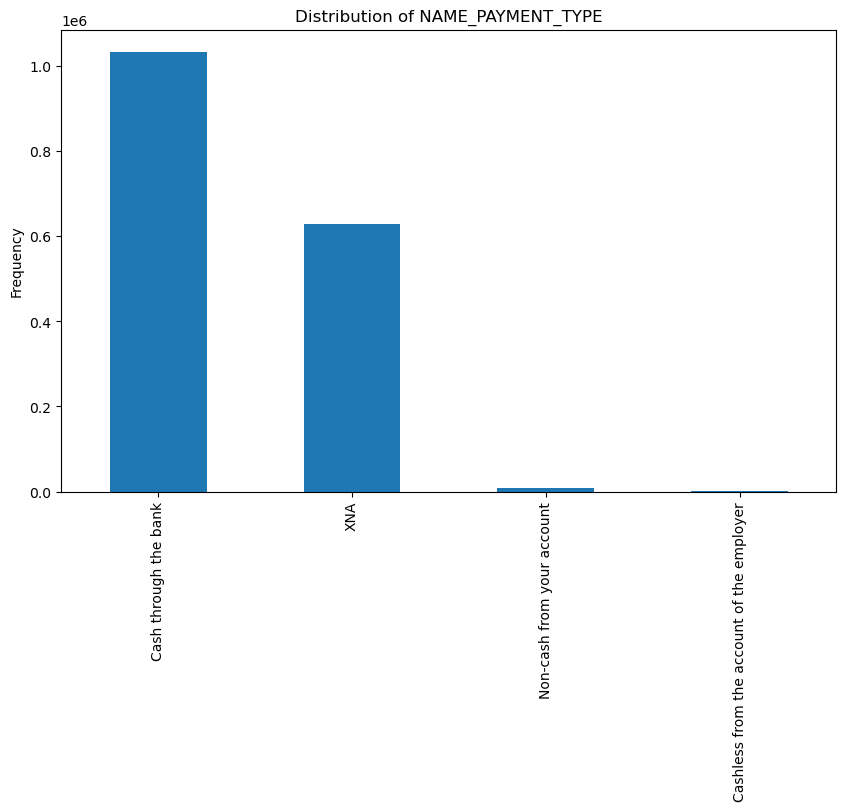

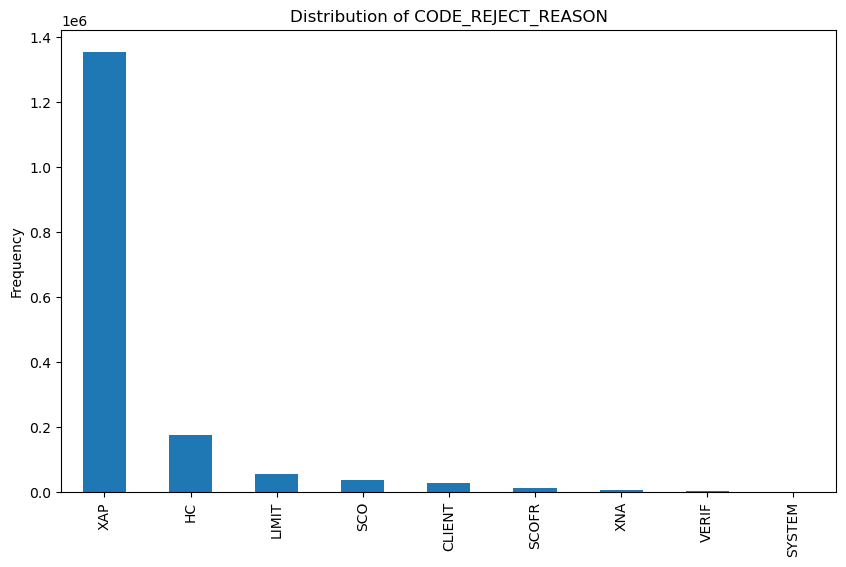

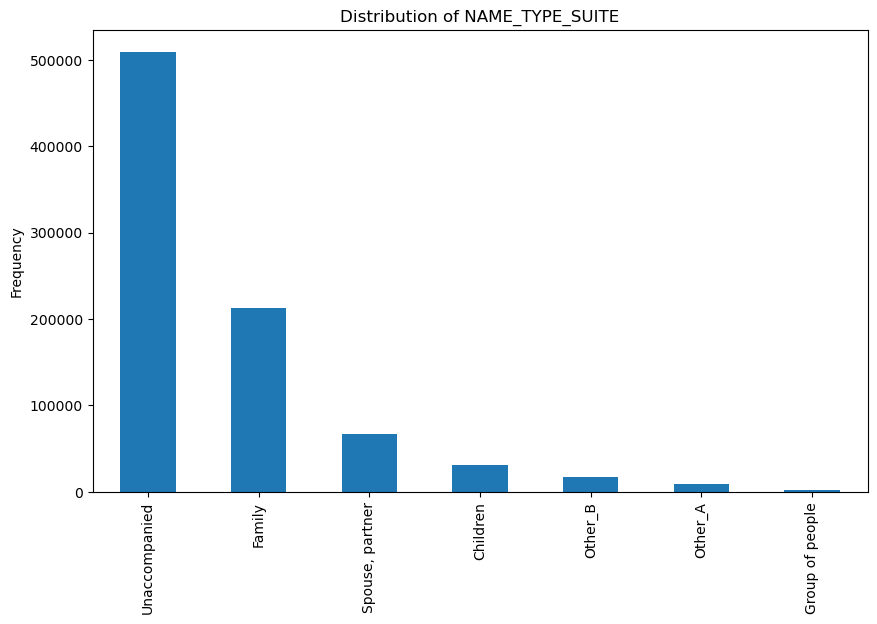

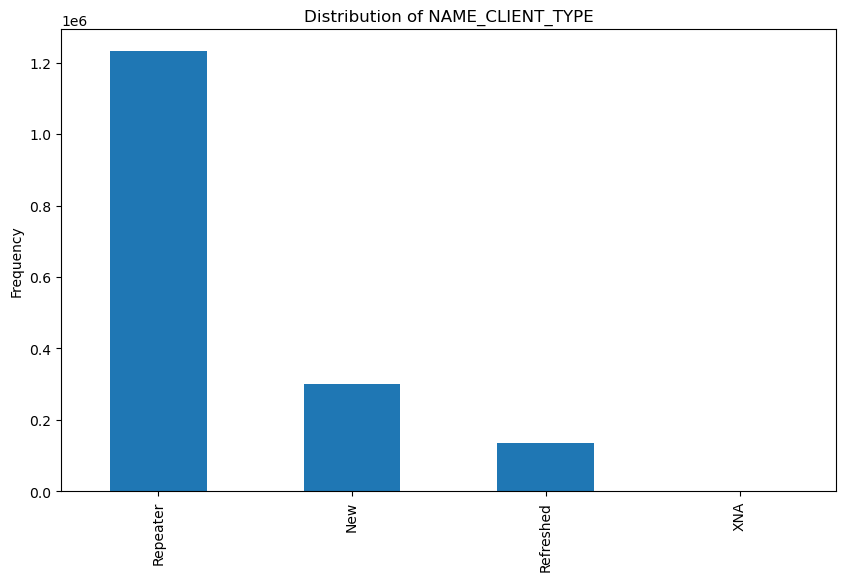

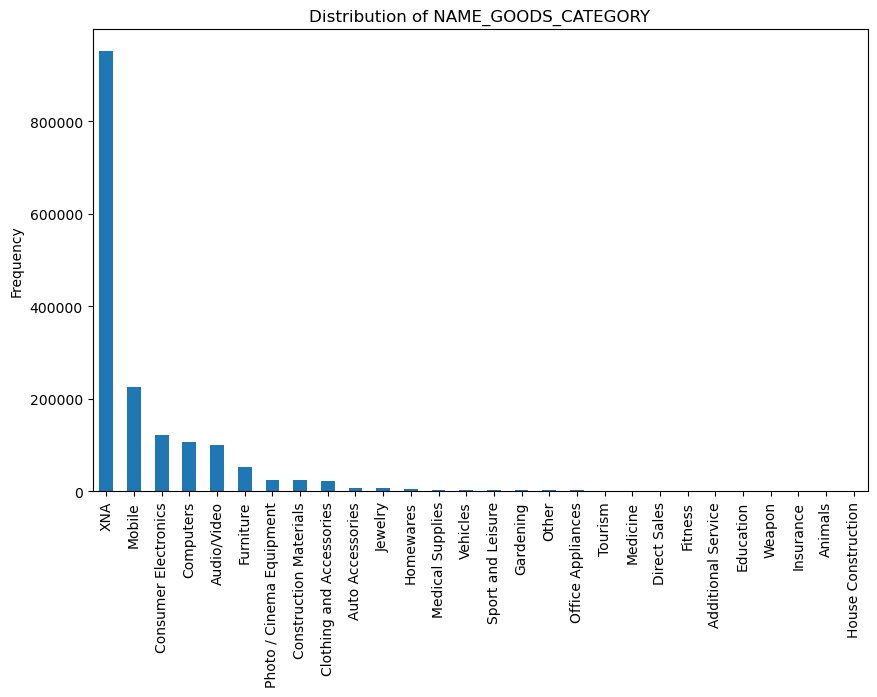

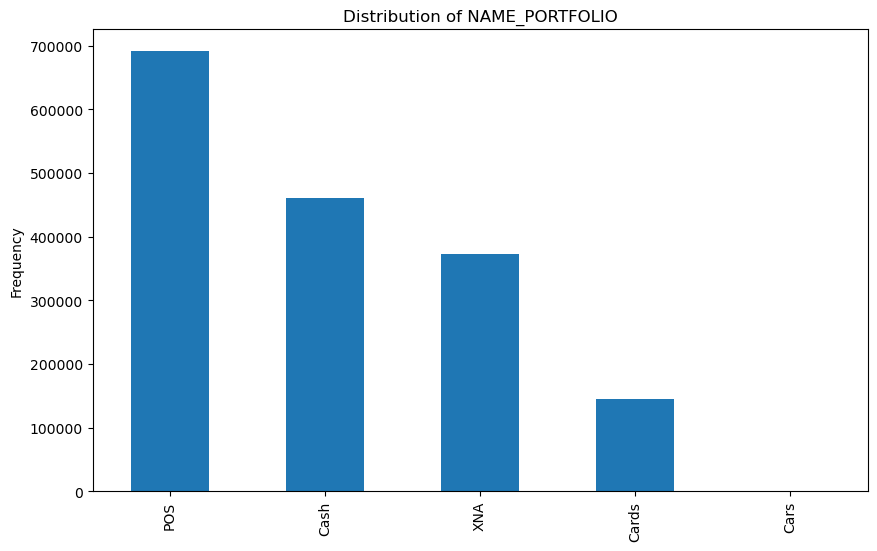

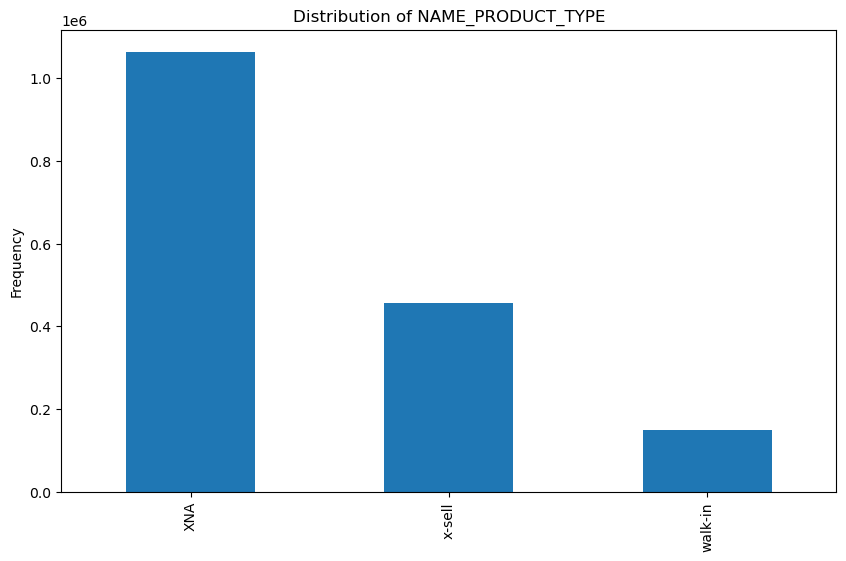

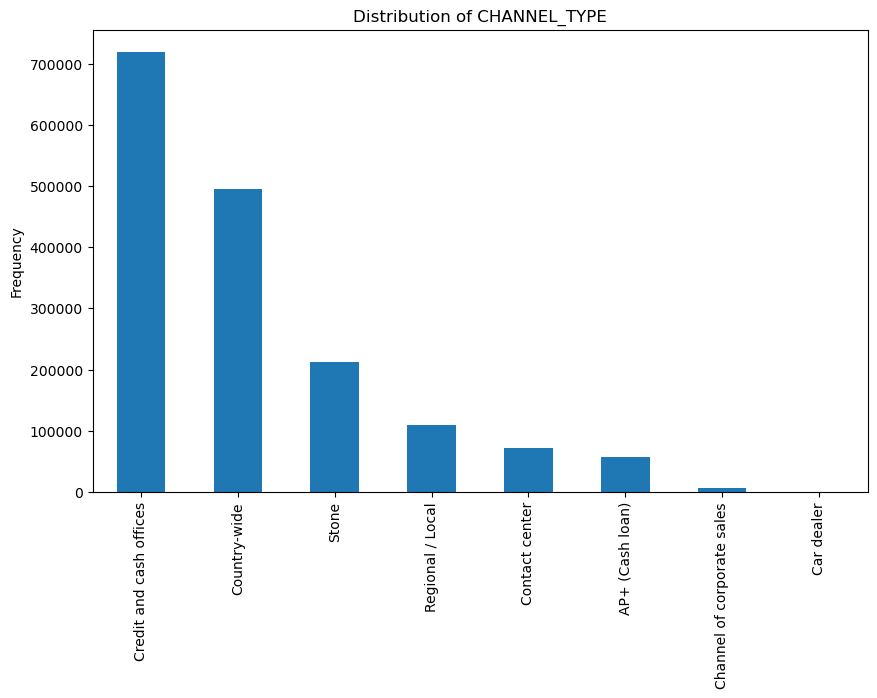

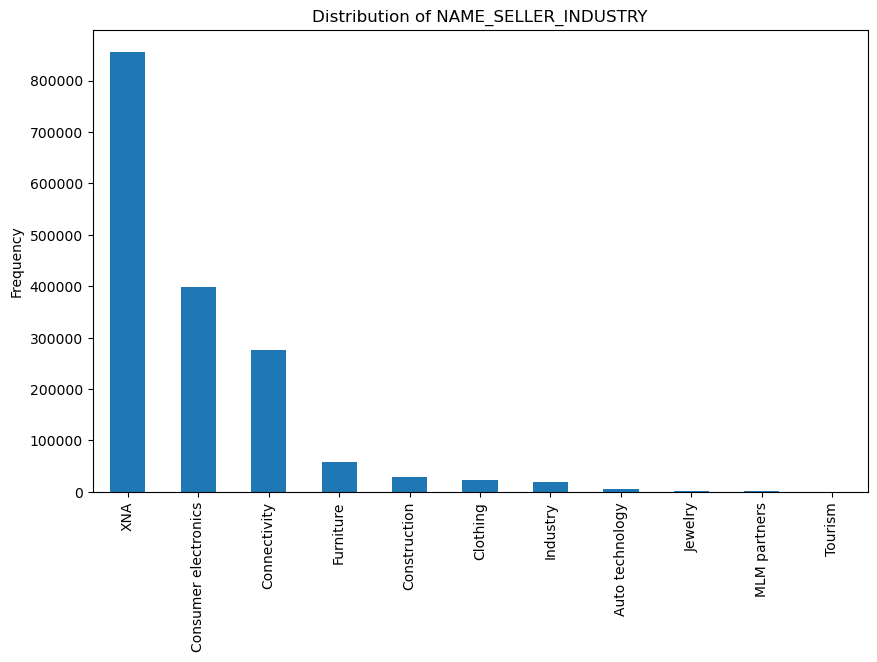

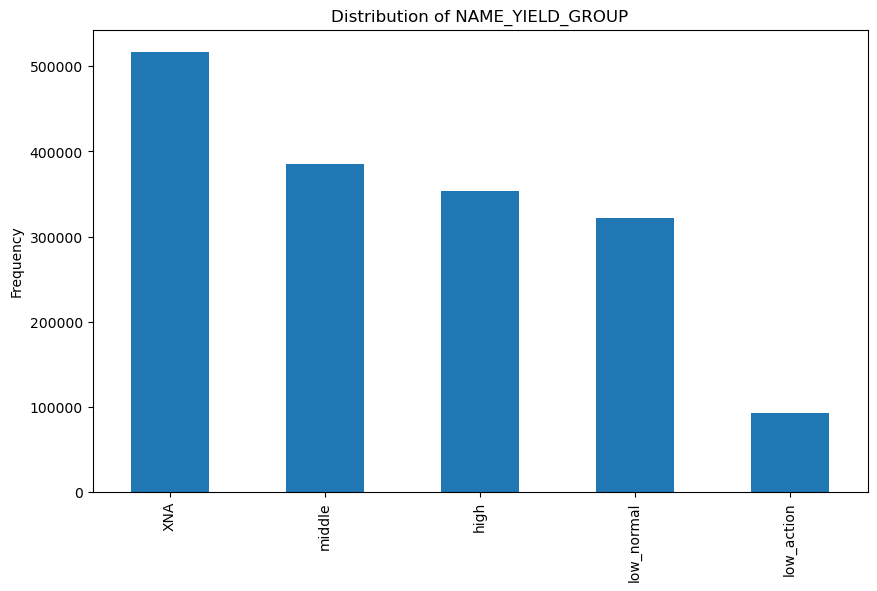

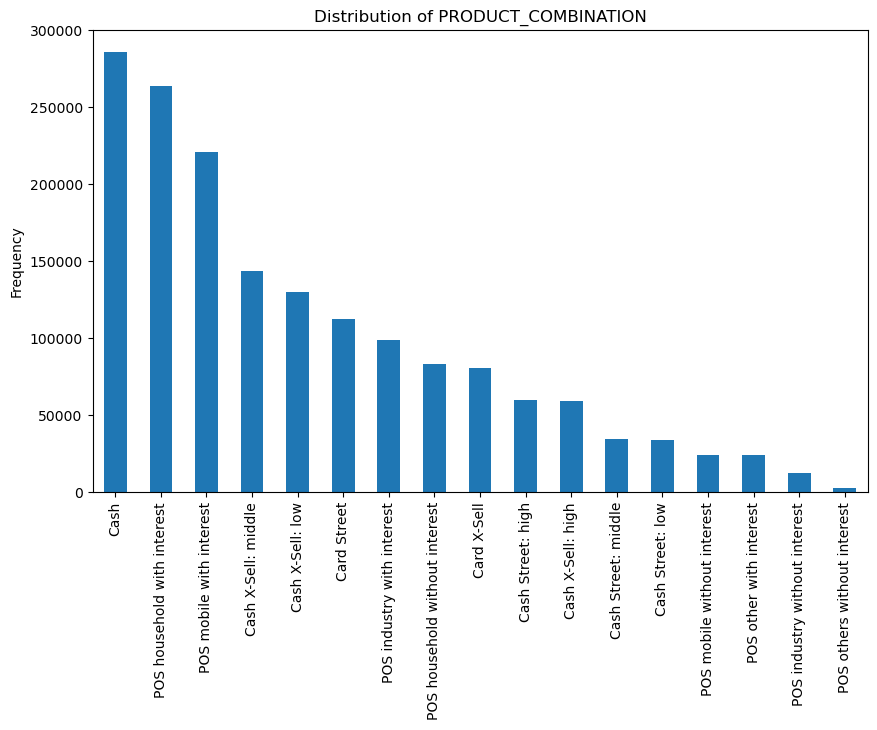

In [13]:
# Membuat bar chart untuk setiap kolom kategorikal
for i, col in enumerate(kolom_kategorikal):
    plt.figure(figsize=(10, 6))
    previous_application[col].value_counts().plot(kind='bar')
    plt.title(f"Distribution of {col}")
    plt.xlabel("")
    plt.ylabel("Frequency")
    plt.show()

# DATA PREPROCESSING

## MISSING VALUES

### Cek Missing Values

In [14]:
# Hitung jumlah missing values untuk setiap kolom
jumlah_missing = previous_application.isnull().sum()

# Hitung persentase missing values untuk setiap kolom
persentase_missing = round((jumlah_missing / len(previous_application)) * 100, 2)

# Gabungkan hasil dalam satu DataFrame
missing_summary = pd.DataFrame({
    'Jumlah Missing Values': jumlah_missing,
    'Persentase Missing Values (%)': persentase_missing
})

# Filter hanya kolom yang memiliki missing values
missing_summary_filtered = missing_summary[missing_summary['Jumlah Missing Values'] > 0]

print(missing_summary_filtered)

                           Jumlah Missing Values  \
AMT_ANNUITY                               372235   
AMT_CREDIT                                     1   
AMT_DOWN_PAYMENT                          895844   
AMT_GOODS_PRICE                           385515   
RATE_DOWN_PAYMENT                         895844   
RATE_INTEREST_PRIMARY                    1664263   
RATE_INTEREST_PRIVILEGED                 1664263   
NAME_TYPE_SUITE                           820405   
CNT_PAYMENT                               372230   
PRODUCT_COMBINATION                          346   
DAYS_FIRST_DRAWING                        673065   
DAYS_FIRST_DUE                            673065   
DAYS_LAST_DUE_1ST_VERSION                 673065   
DAYS_LAST_DUE                             673065   
DAYS_TERMINATION                          673065   
NFLAG_INSURED_ON_APPROVAL                 673065   

                           Persentase Missing Values (%)  
AMT_ANNUITY                                        22.29

### Penanganan

In [15]:
kolom_dihapus = ['AMT_DOWN_PAYMENT', 'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'NAME_TYPE_SUITE',
                 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL']

previous_application.drop(columns=kolom_dihapus, inplace=True)

In [16]:
# Hapus baris yang nilai Missing Valuesnya < 10%
threshold = 0.1  # 10%
columns_with_few_missing = previous_application.columns[previous_application.isnull().mean() < threshold]

# Hapus baris yang memiliki nilai null di kolom tersebut
previous_application = previous_application.dropna(subset=columns_with_few_missing)

In [17]:
# Mengganti dengan nilai tengah (Median) missing values >10%
# Langkah 1: Identifikasi kolom numerikal
numerical_columns = previous_application.select_dtypes(include=['float64', 'int64']).columns

# Langkah 2: Mengisi nilai null dengan median masing-masing kolom
previous_application[numerical_columns] = previous_application[numerical_columns].apply(lambda col: col.fillna(col.median()))

### Cek Kembali

In [18]:
previous_application.isna().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
dtype: int64

## OUTLIERS

In [19]:
previous_application.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1669867.0,1.923089e+06,532599.442310,1000001.0,1.461858e+06,1923117.0,2384284.500,2845382.000
SK_ID_CURR,1669867.0,2.783587e+05,102815.028046,100001.0,1.893300e+05,278721.0,367514.000,456255.000
AMT_ANNUITY,1669867.0,1.490727e+04,13178.773001,0.0,7.545802e+03,11250.0,16828.515,418058.145
AMT_APPLICATION,1669867.0,1.752703e+05,292799.282301,0.0,1.879650e+04,71055.0,180441.000,6905160.000
AMT_CREDIT,1669867.0,1.961547e+05,318595.110482,0.0,2.419200e+04,80550.0,216418.500,6905160.000
AMT_GOODS_PRICE,1669867.0,2.012000e+05,280889.116001,0.0,6.750000e+04,112320.0,180495.000,6905160.000
HOUR_APPR_PROCESS_START,1669867.0,1.248412e+01,3.334075,0.0,1.000000e+01,12.0,15.000,23.000
NFLAG_LAST_APPL_IN_DAY,1669867.0,9.964668e-01,0.059336,0.0,1.000000e+00,1.0,1.000,1.000
DAYS_DECISION,1669867.0,-8.807762e+02,779.150509,-2922.0,-1.300000e+03,-581.0,-280.000,-1.000
SELLERPLACE_AREA,1669867.0,3.140069e+02,7128.182857,-1.0,-1.000000e+00,3.0,82.000,4000000.000


### Menggeser kolom yang memiliki nilai negatif

In [20]:
# Mencari nilai minimum pada kolom
min_value = previous_application['DAYS_DECISION'].min()
min_value2 = previous_application['SELLERPLACE_AREA'].min()

# Jika ada nilai negatif, tambahkan nilai positif untuk menggeser semua nilai menjadi positif
if min_value < 0:
    previous_application['DAYS_DECISION'] = previous_application['DAYS_DECISION'] + abs(min_value)

if min_value2 < 0:
    previous_application['SELLERPLACE_AREA'] = previous_application['SELLERPLACE_AREA'] + abs(min_value2)

### Cek Kembali Nilai Negatif

In [21]:
previous_application.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SK_ID_PREV,1669867.0,1.923089e+06,532599.442310,1000001.0,1.461858e+06,1923117.0,2384284.500,2845382.000
SK_ID_CURR,1669867.0,2.783587e+05,102815.028046,100001.0,1.893300e+05,278721.0,367514.000,456255.000
AMT_ANNUITY,1669867.0,1.490727e+04,13178.773001,0.0,7.545802e+03,11250.0,16828.515,418058.145
AMT_APPLICATION,1669867.0,1.752703e+05,292799.282301,0.0,1.879650e+04,71055.0,180441.000,6905160.000
AMT_CREDIT,1669867.0,1.961547e+05,318595.110482,0.0,2.419200e+04,80550.0,216418.500,6905160.000
AMT_GOODS_PRICE,1669867.0,2.012000e+05,280889.116001,0.0,6.750000e+04,112320.0,180495.000,6905160.000
HOUR_APPR_PROCESS_START,1669867.0,1.248412e+01,3.334075,0.0,1.000000e+01,12.0,15.000,23.000
NFLAG_LAST_APPL_IN_DAY,1669867.0,9.964668e-01,0.059336,0.0,1.000000e+00,1.0,1.000,1.000
DAYS_DECISION,1669867.0,2.041224e+03,779.150509,0.0,1.622000e+03,2341.0,2642.000,2921.000
SELLERPLACE_AREA,1669867.0,3.150069e+02,7128.182857,0.0,0.000000e+00,4.0,83.000,4000001.000


### Log Transformation

In [22]:
# Kolom ini dihapus karena tidak akan digunakan kembali
previous_application = previous_application.drop(columns=['SK_ID_PREV'])

In [23]:
# 1. Identifikasi kolom yang tidak akan di-transformasi
# SK_ID_CURR tidak diubah, dan kolom boolean juga tidak diubah
exclude_columns = ['SK_ID_CURR'] + list(previous_application.select_dtypes(include=['bool']).columns)

# 2. Identifikasi kolom numerik yang akan di-transformasi (kecuali yang ada di exclude_columns)
numeric_columns = previous_application.select_dtypes(include=[np.number]).columns
columns_to_transform = [col for col in numeric_columns if col not in exclude_columns]

# 3. Terapkan log transformation pada kolom-kolom yang sudah diidentifikasi
# Tambahkan 1 untuk menghindari log(0)
previous_application[columns_to_transform] = previous_application[columns_to_transform].apply(lambda x: np.log1p(x))

## ENCODING

In [24]:
previous_application = previous_application.drop(columns=['FLAG_LAST_APPL_PER_CONTRACT'])

In [25]:
# Pertama, identifikasi kolom-kolom kategorikal di dataset
categorical_cols = previous_application.select_dtypes(include='object').columns

# Melakukan Frequency Encoding pada setiap kolom kategorikal
for col in categorical_cols:
    freq_encoding = previous_application[col].value_counts() / len(previous_application)
    previous_application[col] = previous_application[col].map(freq_encoding)

In [26]:
previous_application.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,271877,0.436652,7.456703,9.749520,9.749520,9.749520,0.144074,2.772589,0.693147,0.552328,0.620876,7.955074,0.618943,0.810111,0.73716,0.134566,0.413812,0.636769,0.296040,3.610918,0.165095,2.564949,0.230876,0.132148
1,108129,0.447672,10.134187,13.317109,13.429366,13.317109,0.149141,2.484907,0.693147,0.405971,0.620876,7.922624,0.375501,0.810111,0.73716,0.569184,0.276407,0.273248,0.042696,0.000000,0.512446,3.610918,0.055119,0.077999
2,122040,0.447672,9.619913,11.630717,11.823681,11.630717,0.152743,2.484907,0.693147,0.405971,0.620876,7.871693,0.618943,0.810111,0.73716,0.569184,0.276407,0.273248,0.431151,0.000000,0.512446,2.564949,0.211592,0.035512
3,176158,0.447672,10.758803,13.017005,13.062170,13.017005,0.151815,2.079442,0.693147,0.405971,0.620876,7.787797,0.618943,0.810111,0.73716,0.569184,0.276407,0.273248,0.431151,0.000000,0.512446,2.564949,0.230876,0.086164
4,202054,0.447672,10.371157,12.729324,12.909309,12.729324,0.149141,2.302585,0.693147,0.014232,0.174054,7.669495,0.618943,0.104920,0.73716,0.569184,0.276407,0.089983,0.431151,0.000000,0.512446,3.218876,0.211592,0.035715


## AGGREGASI

In [27]:
# Pertama, kelompokkan berdasarkan SK_ID_CURR dan hitung rata-rata untuk kolom lainnya
agg_df = previous_application.groupby('SK_ID_CURR').mean().reset_index()

# Selanjutnya, hitung berapa kali setiap SK_ID_CURR muncul dan tambahkan sebagai kolom baru
agg_df['FREQ_POSH_CASH'] = previous_application.groupby('SK_ID_CURR').size().values

In [28]:
previous_application = agg_df

In [30]:
# Ganti nama salah satu kolom
previous_application = previous_application.rename(columns={'FREQ_POSH_CASH': 'FREQ_PREVIOUS_APP'})

In [31]:
previous_application.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,FREQ_PREVIOUS_APP
0,100001,0.436652,8.281977,10.120070,10.076937,10.120070,0.150901,2.639057,0.693147,0.552328,0.620876,7.075809,0.618943,0.810111,0.081219,0.134566,0.413812,0.636769,0.296040,3.218876,0.165095,2.197225,0.211592,0.132148,1
1,100002,0.436652,9.132679,12.095454,12.095454,12.095454,0.144074,2.302585,0.693147,0.552328,0.620876,7.748029,0.375501,0.810111,0.180459,0.002018,0.413812,0.636769,0.127006,6.218600,0.002988,3.218876,0.192887,0.014300,1
2,100003,0.440325,10.462473,12.526196,12.580207,12.526196,0.131207,2.742637,0.693147,0.503542,0.620876,7.233161,0.537796,0.810111,0.299866,0.224707,0.368010,0.515595,0.284732,4.184641,0.261863,2.358603,0.218213,0.098352,3
3,100004,0.436652,8.586393,10.097532,9.908823,10.097532,0.150901,1.791759,0.693147,0.552328,0.620876,7.653495,0.618943,0.810111,0.180459,0.134566,0.413812,0.636769,0.064992,3.465736,0.165095,1.609438,0.230876,0.014422,1
4,100005,0.442162,8.903769,5.352952,5.300245,11.167510,0.150021,2.441401,0.693147,0.479150,0.405057,7.773488,0.497222,0.810111,0.458809,0.351875,0.318257,0.636769,0.363595,1.831781,0.338770,2.564949,0.260559,0.151707,2


## SCALING

In [32]:
from sklearn.preprocessing import MinMaxScaler

# Identifikasi kolom yang bertipe boolean
boolean_columns = previous_application.select_dtypes(include=['bool']).columns

# Tambahkan kolom SK_ID_CURR ke daftar kolom yang akan dikecualikan
exclude_columns = ['SK_ID_CURR'] + list(boolean_columns)

# Pilih kolom yang bukan boolean dan bukan SK_ID_CURR
scaling_columns = previous_application.columns.difference(exclude_columns)

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Lakukan scaling hanya pada kolom yang dipilih
previous_application[scaling_columns] = scaler.fit_transform(previous_application[scaling_columns])

In [34]:
previous_application.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,FREQ_PREVIOUS_APP
0,100001,0.966807,0.658404,0.665171,0.662336,0.665171,0.965960,0.830400,1.0,1.000000,1.000000,0.886728,1.000000,1.0,0.108773,0.236368,1.000000,1.000000,0.686430,0.211743,0.321763,0.512119,0.615050,0.769542,0.000000
1,100002,0.966807,0.726033,0.795009,0.795009,0.795009,0.839752,0.724527,1.0,1.000000,1.000000,0.970970,0.606268,1.0,0.243610,0.003479,1.000000,1.000000,0.294131,0.409070,0.005235,0.750240,0.541524,0.075234,0.000000
2,100003,0.977871,0.831750,0.823321,0.826871,0.823321,0.601904,0.862992,1.0,0.911671,1.000000,0.906447,0.868756,1.0,0.405849,0.394748,0.889250,0.778389,0.660187,0.275273,0.510713,0.549732,0.641074,0.570428,0.026316
3,100004,0.966807,0.682604,0.663690,0.651287,0.663690,0.965960,0.563791,1.0,1.000000,1.000000,0.959123,1.000000,1.0,0.243610,0.236368,1.000000,1.000000,0.150207,0.227982,0.321763,0.375120,0.690848,0.075950,0.000000
4,100005,0.983403,0.707835,0.351839,0.348374,0.734018,0.949687,0.768206,1.0,0.867507,0.643302,0.974160,0.803134,1.0,0.621805,0.618184,0.768945,1.000000,0.843215,0.120498,0.660882,0.597826,0.807525,0.884771,0.013158


# SIMPAN DATASET KE CSV

In [35]:
# Simpan DataFrame ke file CSV
previous_application.to_csv('code_previous_application.csv', index=False)